## Timeseries forecasting for weather prediction
* code source: https://keras.io/examples/timeseries/timeseries_weather_forecasting/
* data source:  Max Planck Institute for Biogeochemistry


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### 1. Data

In [2]:
from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

In [3]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [4]:
zip_file

<zipfile.ZipFile filename='/Users/xieyanan/.keras/datasets/jena_climate_2009_2016.csv.zip' mode='r'>

### 2. Raw data visualisation

In [5]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

In [6]:
feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

In [7]:
colors = [
     "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

In [8]:
date_time_key = "Date Time"


In [9]:
def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()

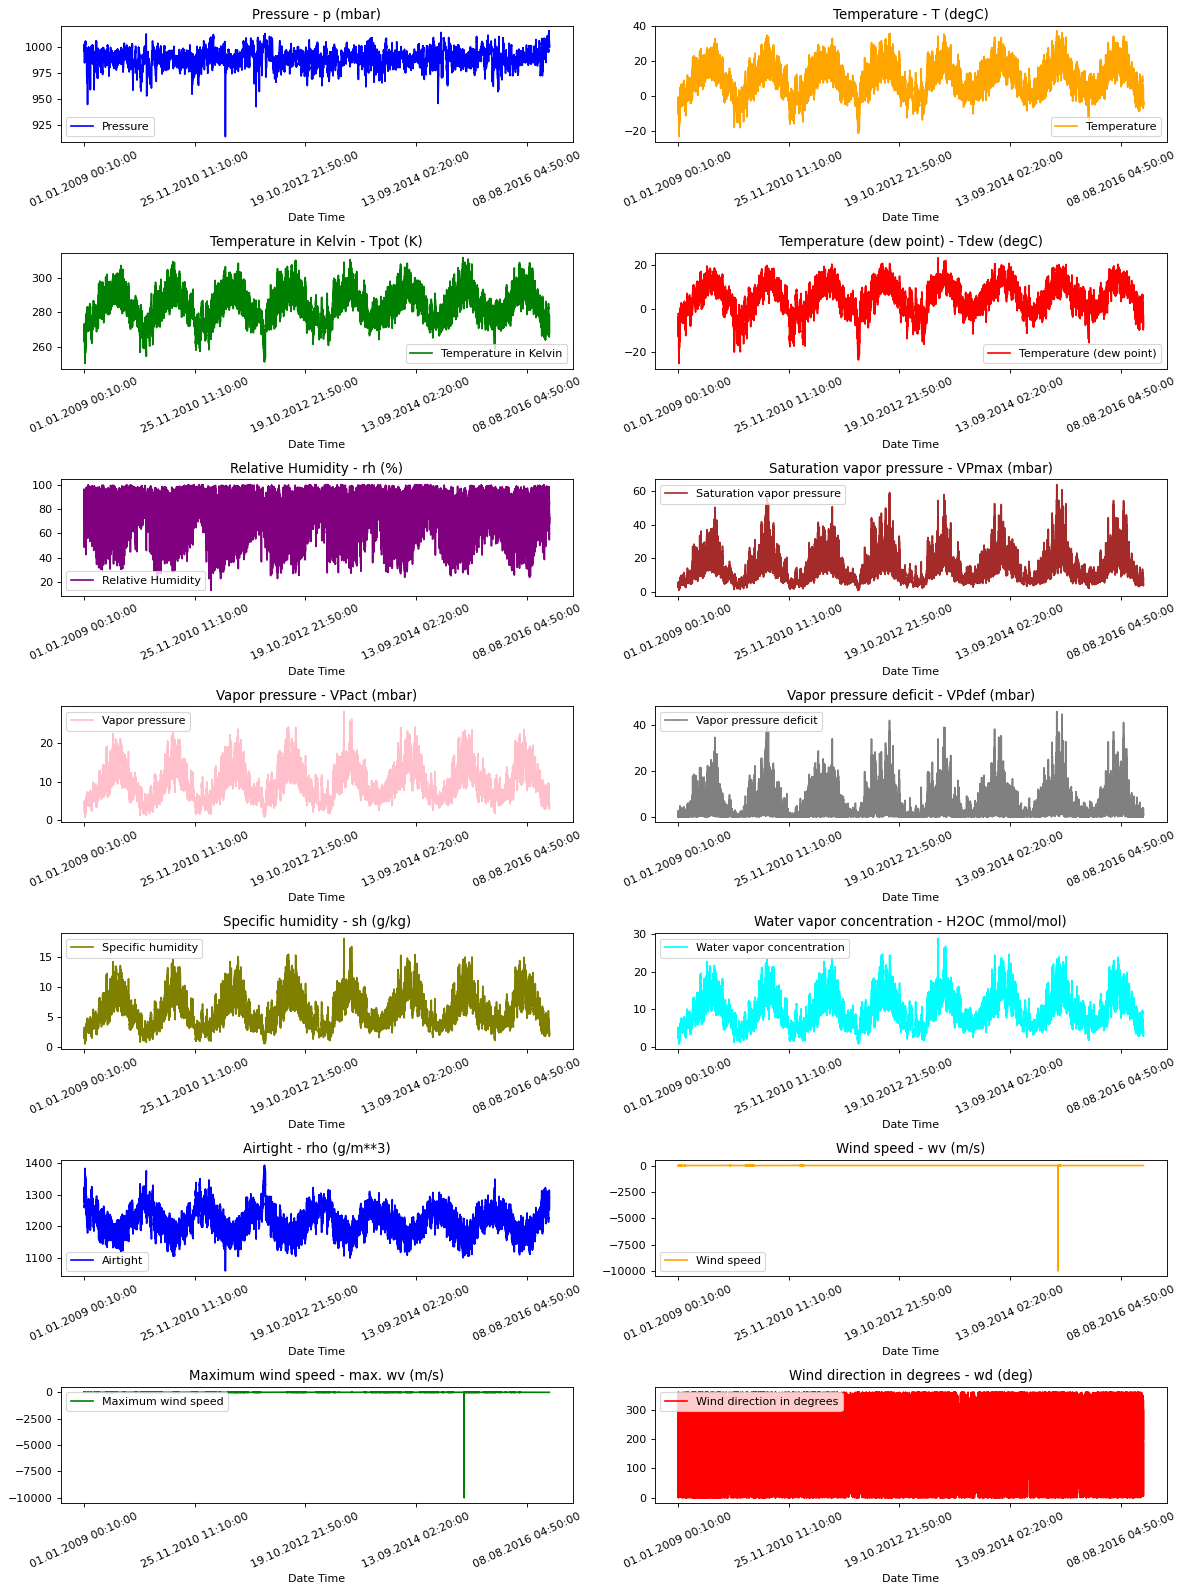

In [10]:
show_raw_visualization(df)

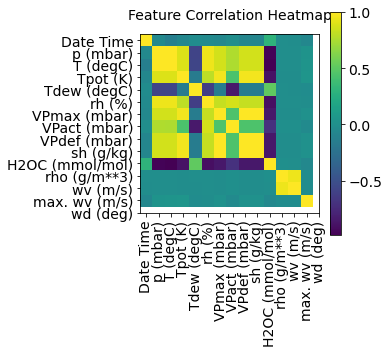

In [11]:
## heatmap correlation
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()  ## get current axes
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df)

### 3. Data processing

In [12]:
split_fraction = 0.715

train_split = int(split_fraction * int(df.shape[0]))
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [13]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


In [14]:
features

,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),wv (m/s)
Date Time,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,3.33,0.22,1.94,1307.75,1.03
01.01.2009 00:20:00,996.57,-8.41,3.23,0.21,1.89,1309.80,0.72
01.01.2009 00:30:00,996.53,-8.51,3.21,0.20,1.88,1310.24,0.19
01.01.2009 00:40:00,996.51,-8.31,3.26,0.19,1.92,1309.19,0.34
01.01.2009 00:50:00,996.51,-8.27,3.27,0.19,1.92,1309.00,0.32
...,...,...,...,...,...,...,...
31.12.2016 23:20:00,1000.07,-4.05,4.52,1.22,2.06,1292.98,0.67
31.12.2016 23:30:00,999.93,-3.35,4.77,1.44,2.07,1289.44,1.14
31.12.2016 23:40:00,999.82,-3.16,4.84,1.55,2.05,1288.39,1.08


In [15]:
features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

In [16]:
train_data

,0,1,2,3,4,5,6
0,0.955451,-2.000020,-1.319782,-0.788479,-1.500927,2.237658,-0.732997
1,0.961528,-2.045185,-1.332806,-0.790561,-1.519521,2.287838,-0.936002
2,0.956666,-2.056766,-1.335410,-0.792642,-1.523239,2.298608,-1.283076
3,0.954236,-2.033604,-1.328898,-0.794724,-1.508364,2.272906,-1.184847
4,0.954236,-2.028972,-1.327596,-0.794724,-1.508364,2.268256,-1.197944
...,...,...,...,...,...,...,...
300688,-0.104339,0.853478,0.713250,-0.116113,1.429472,-0.878353,-0.890162
300689,-0.101908,0.881272,0.752322,-0.024521,1.392285,-0.900138,-0.477604
300690,-0.111631,0.902117,0.780974,0.021274,1.392285,-0.920454,-0.791934
300691,-0.117708,0.896327,0.771857,0.012948,1.388566,-0.916538,-0.791934


In [17]:
val_data

,0,1,2,3,4,5,6
300693,-0.109200,0.855794,0.717157,-0.072399,1.384847,-0.879577,-0.942551
300694,-0.110416,0.852320,0.711948,-0.078644,1.381128,-0.876639,-1.302721
300695,-0.107985,0.788626,0.627292,-0.205623,1.373691,-0.820830,-1.197944
300696,-0.109200,0.734196,0.556963,-0.305541,1.358816,-0.773343,-1.217590
300697,-0.109200,0.679767,0.487936,-0.386725,1.325347,-0.724388,-0.667512
...,...,...,...,...,...,...,...
420546,1.386902,-1.540264,-1.164797,-0.580316,-1.456301,1.876123,-0.968745
420547,1.369887,-1.459199,-1.132237,-0.534520,-1.452583,1.789472,-0.660963
420548,1.356518,-1.437195,-1.123121,-0.511622,-1.460020,1.763770,-0.700254
420549,1.355303,-1.561109,-1.172611,-0.571990,-1.482333,1.890320,-0.431764


### 4. Training dataset

In [18]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)

In [19]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [20]:
x_train

array([[ 0.95545114, -2.00002   , -1.31978162, ..., -1.50092673,
         2.23765845, -0.73299722],
       [ 0.96152792, -2.04518494, -1.33280552, ..., -1.51952063,
         2.28783773, -0.93600233],
       [ 0.9566665 , -2.0567657 , -1.3354103 , ..., -1.52323941,
         2.29860792, -1.28307559],
       ...,
       [-0.11163086,  0.90211719,  0.78097422, ...,  1.39228456,
        -0.92045437, -0.79193419],
       [-0.11770764,  0.89632681,  0.77185748, ...,  1.38856578,
        -0.91653794, -0.79193419],
       [-0.11041551,  0.8639007 ,  0.72757621, ...,  1.39600334,
        -0.88740948, -0.8312255 ]])

In [21]:
y_train

,1
792,-2.745821
793,-2.701814
794,-2.641594
795,-2.597587
796,-2.509573
...,...
301480,0.272124
301481,0.210746
301482,0.264018
301483,0.305708


### 5. Validation dataset

In [22]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

In [23]:

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 7)
Target shape: (256, 1)


In [24]:
x_val

array([[-0.10920015,  0.85579417,  0.71715708, ...,  1.384847  ,
        -0.87957661, -0.94255088],
       [-0.11041551,  0.85231994,  0.71194752, ...,  1.38112822,
        -0.87663929, -1.30272125],
       [-0.1079848 ,  0.78862579,  0.62729214, ...,  1.37369066,
        -0.82083013, -1.19794442],
       ...,
       [ 0.77557855,  0.09378049, -0.1463278 , ..., -0.07291499,
         0.08019399,  4.23735382],
       [ 0.7986703 ,  0.10536125, -0.13460628, ..., -0.06175865,
         0.07505368,  3.90337766],
       [ 0.7986703 ,  0.13315506, -0.10855848, ..., -0.06175865,
         0.04959687,  3.49081888]])

In [25]:
y_val

,1
301485,0.225801
301486,0.314973
301487,0.291811
301488,0.311499
301489,0.327712
...,...
420546,-1.540264
420547,-1.459199
420548,-1.437195
420549,-1.561109


### 6. Training

In [26]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 7)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                5120      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [27]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=10000,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10000
1172/1172 [==============================] - 84s 71ms/step - loss: 0.3622 - val_loss: 0.1548

Epoch 00001: val_loss improved from inf to 0.15483, saving model to model_checkpoint.h5
Epoch 2/10000
1172/1172 [==============================] - 79s 67ms/step - loss: 0.1447 - val_loss: 0.1454

Epoch 00002: val_loss improved from 0.15483 to 0.14540, saving model to model_checkpoint.h5
Epoch 3/10000
1172/1172 [==============================] - 83s 71ms/step - loss: 0.1244 - val_loss: 0.1548

Epoch 00003: val_loss did not improve from 0.14540
Epoch 4/10000
1172/1172 [==============================] - 82s 70ms/step - loss: 0.1167 - val_loss: 0.1603

Epoch 00004: val_loss did not improve from 0.14540
Epoch 5/10000
1172/1172 [==============================] - 83s 71ms/step - loss: 0.1152 - val_loss: 0.1477

Epoch 00005: val_loss did not improve from 0.14540
Epoch 6/10000
1172/1172 [==============================] - 82s 70ms/step - loss: 0.1119 - val_loss: 0.1411

Epoch 00006: val_lo

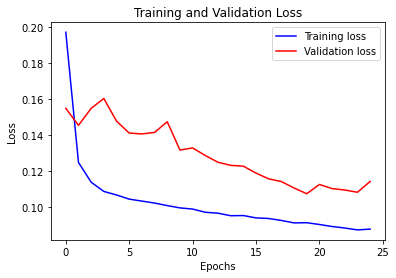

In [28]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

### 7. Prediction

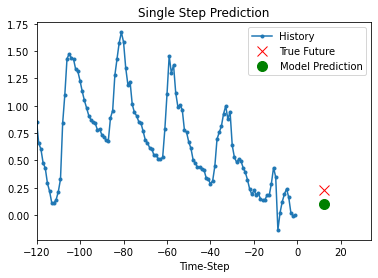

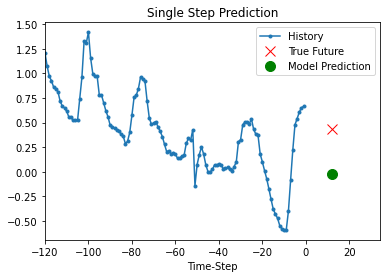

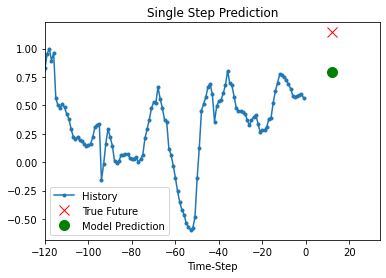

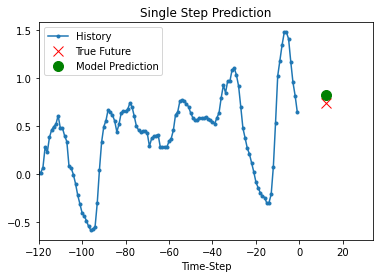

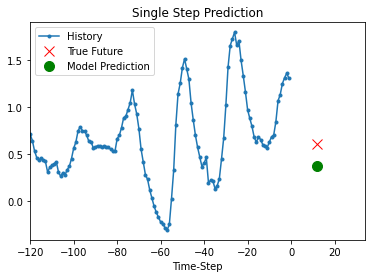

In [29]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )